# Semantic Textual Similarity


Matt Barattini,
Call Simulator

Semantic Textual Similarity, or semantic similarity, is a component of Natural Language Processing that deals with measuring the difference in meaning, or semantic content, of texts. Semantic Similarity is used in a variety of common machine learning tasks such as information retrieval, question-answer modeling, text summarization, paraphrasing, and text generation.

Modern approaches to semantic similarity usually involve creating embeddings of two texts and measuring the cosine similarity between them. In this post we will utilize pretrained language models from the Sentence Transformers module.

## Embeddings

Measuring how semantically similar two sentences are can be a difficult task when working with the text representations. Instead, text is commonly encoded into an **embedding**. Embeddings are distributional vector representations of text. These representations are learned while training a language model. Creating a vector representation of a sentence "embeds" the sentence in a vector space. Distance metrics can then be used to calculate semantic similarity in the embedded space.  

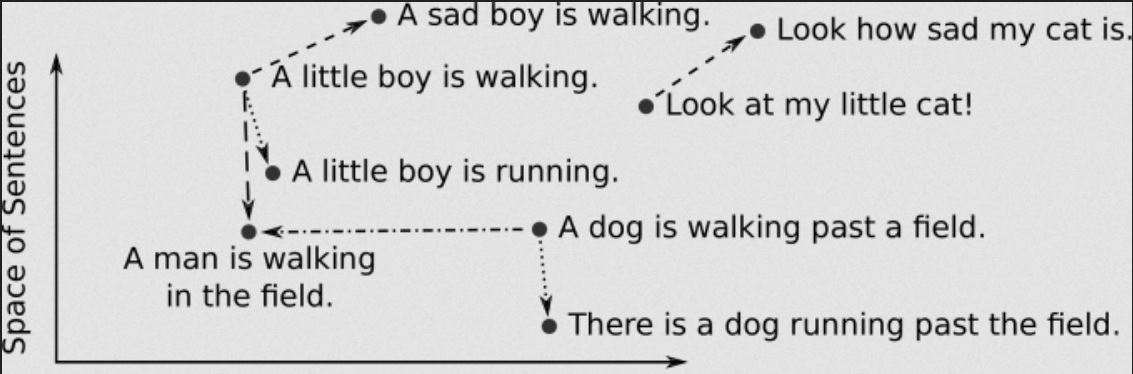

In [1]:
from IPython.display import Image
Image(filename='sentence_vector_space.jpg') 

The image above visualizes sentences as points in space. The arrows represent distances between the sentences semantic meanings.

Image Source: ["In search for linear relations in sentence embedding spaces." (Barančíková & Bojar,2019) DEEPAI](https://deepai.org/publication/in-search-for-linear-relations-in-sentence-embedding-spaces)

### Cosine Similarity

The most widely used metric for determining semantic similarity between two text sequences is the cosine similarity between their embeddings. Cosine similarity outputs a value in the interval [-1,1]

Cosine Similarity between vectors x and y:     
$$ cos(\theta)  = \frac{x \cdot y}{\lVert x \rVert \lVert y \rVert}$$

Where $\theta$ is the angle formed between the two vectors. The higher the cosine of the angle the more similar the two vectors are. A cosine similarity of 1 indicates the vectors overlap. 

### Sentence Transformers

[Sentence Transformers](https://www.sbert.net/index.html) is a Python framework for generating text embeddings and offers many pre-trained models. The original paper for the training process was introduced in the paper ["Sentence-BERT: Sentence Embeddings using Siamese BERT-Networks" (Reimers and Gurevych, 2019)](https://arxiv.org/abs/1908.10084). Sentence Transformers utilize the transformer language model architecture to create **contextualized** embeddings. Contextualized embeddings can capture differences in the meaning of a word based on how it is used in a sentence. For example, the word "bank" may refer to a financial institution or it may refer to a river bank, depending on the context of the sentence. The pretrained transformer models from Sentence Transformers are trained over large datasets to understand the many different contexts a word may be used. 

### Calculating Cosine Similarity of Sentence Embeddings


We will demonstrate how to measure the semantic similarity by doing the following:
1. Create sentences to compare.
2. Convert sentences to embeddings using a pretrained embedding model.
3. Calculate the cosine similarity between the embeddings

In [2]:
#imports
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [3]:
#load embedding model
embedding_model = SentenceTransformer('stsb-mpnet-base-v2')

# 1. Create sentences
sentences_1 = ["Sorry, there is no pasta left.", "Okay, Tell me exactly what happened."]
sentences_2 = [ "None of the pasta remains.", "Alright, now tell me exactly what is happening?"]

# 2. Convert sentences to embeddings
embeddings1 = embedding_model.encode(sentences_1)
embeddings2 = embedding_model.encode(sentences_2)

# 3. Calculate cosine similarity
similarities = cosine_similarity(embeddings1,embeddings2)

for i,s1 in enumerate(sentences_1):
    for j,s2 in enumerate(sentences_2):
        print(f"Sentence 1:  {s1}")
        print(f"Sentence 2:  {s2}")
        print(f"Cosine Similarity  {similarities[i][j].item()}")
        print()

Sentence 1:  Sorry, there is no pasta left.
Sentence 2:  None of the pasta remains.
Cosine Similarity  0.86346435546875

Sentence 1:  Sorry, there is no pasta left.
Sentence 2:  Alright, now tell me exactly what is happening?
Cosine Similarity  0.0767505019903183

Sentence 1:  Okay, Tell me exactly what happened.
Sentence 2:  None of the pasta remains.
Cosine Similarity  0.013782517984509468

Sentence 1:  Okay, Tell me exactly what happened.
Sentence 2:  Alright, now tell me exactly what is happening?
Cosine Similarity  0.8199233412742615



The sentence pairs "Okay, Tell me exactly what happened." and "Alright, now tell me exactly what is happening?" have a higher cosine similarity indicating their similar meanings. The higher similarity and related meaning also holds for the sentence pair "Sorry, there is no pasta left." and "None of the pasta remains.". The sentence pair "Okay, Tell me exactly what happened." and "None of the pasta remains." have a low similarity because the sentences are not related in semantic meaning. 

## Semantic Textual Similarity Benchmark

The Semantic Textual Similarity (STS) Benchmark is a dataset selected SemEval STS tasks from 2012-2017. Datasets for each year's task are pulled from the Standford Natural Language Inference Corpus. The dataset includes pairs of sentences with with a human labeled 0-5 similarity score. Below is an example of sentence pairs and descriptions of how labels are applied. 

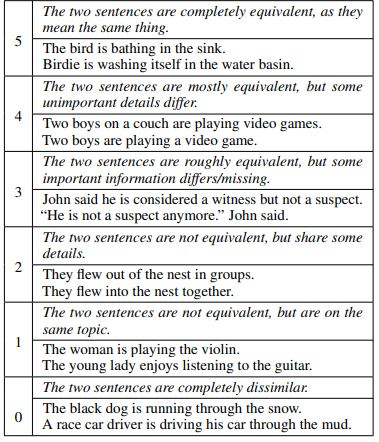

In [4]:
Image(filename='STS_gold_labels.jpg') 

Source: Cer, Daniel, et al. "Semeval-2017 task 1: Semantic textual similarity-multilingual and cross-lingual focused evaluation." arXiv preprint arXiv:1708.00055 (2017).
        https://aclanthology.org/S17-2001.pdf

The STS Benchmark datset contains a train and a test set. In this post we will examine the performance of different models on the test set. Model names that begin with "stsb" have been trained on the STS training set already and models that begin with "all" have been trained on a variety of different natural language tasks. For more information on each model and its training data see https://www.sbert.net/docs/pretrained_models.html. More info information of the benchmark dataset can be found [here](http://ixa2.si.ehu.eus/stswiki/index.php/STSbenchmark).  

# Benchmarking Models on STS

First we will import necesary modules and load the sts benchmark dataset

In [5]:
from datasets import load_dataset
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()

In [6]:
# Load STS Benchmark Dataset
stsb_dataset = load_dataset('stsb_multi_mt', 'en')
stsb_train = pd.DataFrame(stsb_dataset['train'])
stsb_test = pd.DataFrame(stsb_dataset['test'])

Found cached dataset stsb_multi_mt (C:/Users/mbara/.cache/huggingface/datasets/stsb_multi_mt/en/1.0.0/a5d260e4b7aa82d1ab7379523a005a366d9b124c76a5a5cf0c4c5365458b0ba9)


  0%|          | 0/3 [00:00<?, ?it/s]

In [7]:
stsb_test.head()

,sentence1,sentence2,similarity_score
0,A girl is styling her hair.,A girl is brushing her hair.,2.5
1,A group of men play soccer on the beach.,A group of boys are playing soccer on the beach.,3.6
2,One woman is measuring another woman's ankle.,A woman measures another woman's ankle.,5.0
3,A man is cutting up a cucumber.,A man is slicing a cucumber.,4.2
4,A man is playing a harp.,A man is playing a keyboard.,1.5


Next we will define a helper function that loads a model and calculcates the cosine similarity between each pair in the dataset. The function takes in the Sentence Transformer model name as an argument.

In [8]:
def sts_test_similarity(model_name):
    model = SentenceTransformer(model_name)
    sentence1_emb = model.encode(stsb_test['sentence1'], show_progress_bar=True)
    sentence2_emb = model.encode(stsb_test['sentence2'], show_progress_bar=True)
    return np.diag(cosine_similarity(sentence1_emb, sentence2_emb))


Then the helper function is then run on each model we would like to test. The output is saved as a new column on the stsb_test data frame.

In [9]:
benchmark_models = ['stsb-mpnet-base-v2','all-mpnet-base-v2','stsb-distilroberta-base-v2','all-distilroberta-v1']
for mod in benchmark_models: stsb_test[mod] = sts_test_similarity(mod) 

Batches:   0%|          | 0/44 [00:00<?, ?it/s]

Batches:   0%|          | 0/44 [00:00<?, ?it/s]

Batches:   0%|          | 0/44 [00:00<?, ?it/s]

Batches:   0%|          | 0/44 [00:00<?, ?it/s]

Batches:   0%|          | 0/44 [00:00<?, ?it/s]

Batches:   0%|          | 0/44 [00:00<?, ?it/s]

Batches:   0%|          | 0/44 [00:00<?, ?it/s]

Batches:   0%|          | 0/44 [00:00<?, ?it/s]

In [10]:
stsb_test.head(5)

,sentence1,sentence2,similarity_score,stsb-mpnet-base-v2,all-mpnet-base-v2,stsb-distilroberta-base-v2,all-distilroberta-v1
0,A girl is styling her hair.,A girl is brushing her hair.,2.5,0.653582,0.751502,0.777379,0.775237
1,A group of men play soccer on the beach.,A group of boys are playing soccer on the beach.,3.6,0.825622,0.802422,0.835442,0.819210
2,One woman is measuring another woman's ankle.,A woman measures another woman's ankle.,5.0,0.970068,0.970881,0.933987,0.967941
3,A man is cutting up a cucumber.,A man is slicing a cucumber.,4.2,0.976945,0.899563,0.967665,0.901548
4,A man is playing a harp.,A man is playing a keyboard.,1.5,0.471990,0.396793,0.386277,0.398478


Next we will examine the relationship between the cosine similarity of embeddings and the semantic textual similarity scores in from STS Benchmark set. For each embedding model, every sentence pair is plotted with its cosine similarity on the Y-axis and STS score on the X-axis.

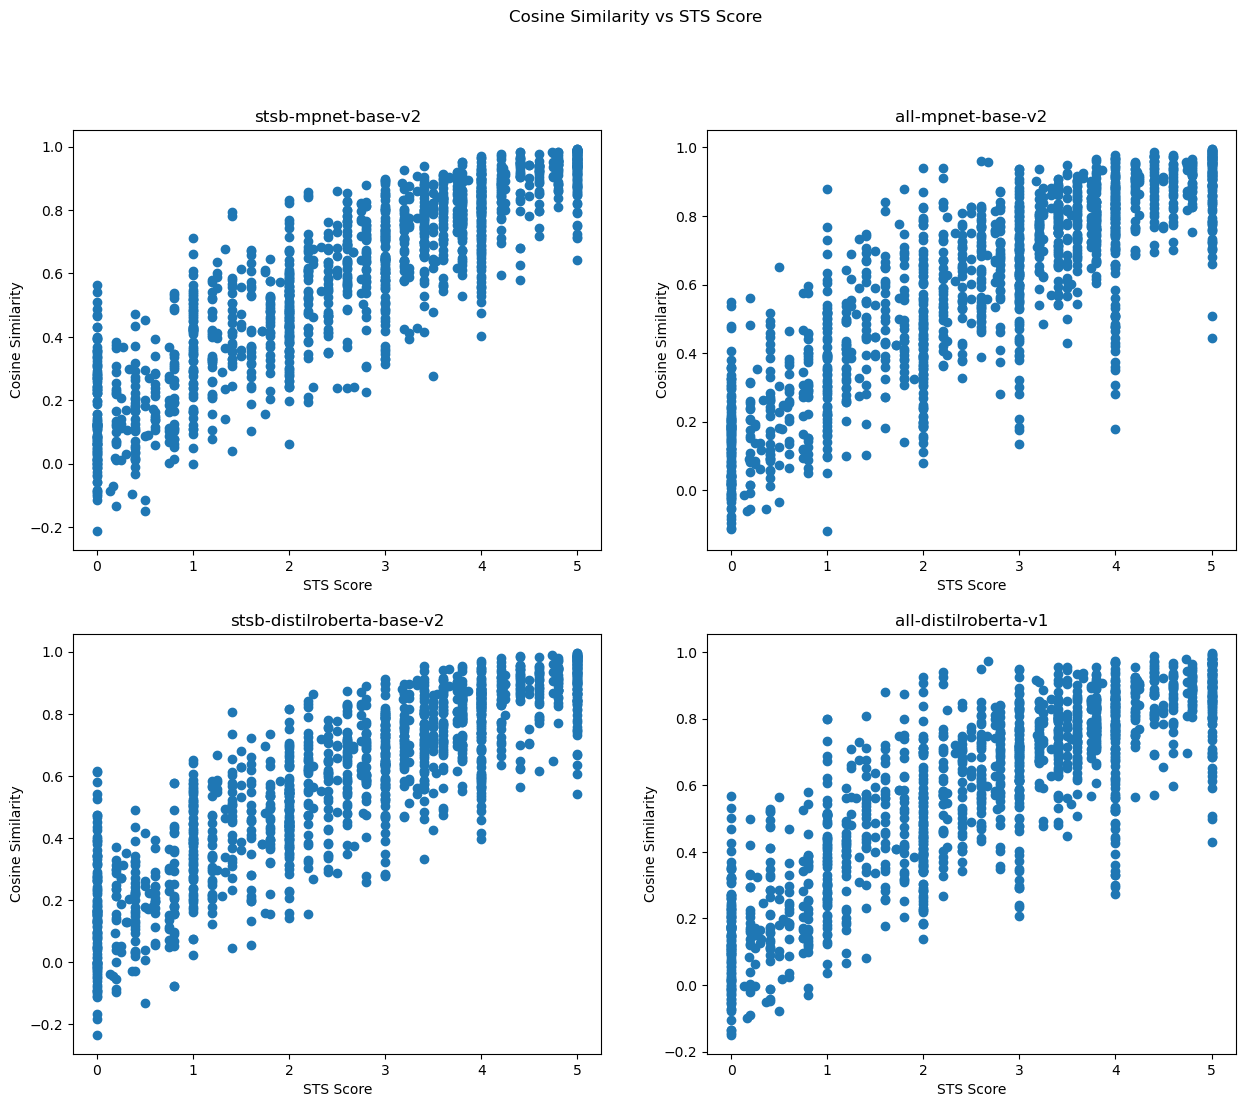

In [11]:
import matplotlib.pyplot as plt
x = np.linspace(min(stsb_test['similarity_score']),max(stsb_test['similarity_score']),100)
fig, axs = plt.subplots(2, 2,figsize=(15,12))
((ax1, ax2), (ax3, ax4)) = axs
fig.suptitle('Cosine Similarity vs STS Score')
ax1.scatter(stsb_test['similarity_score'], stsb_test['stsb-mpnet-base-v2'])
ax1.set(title='stsb-mpnet-base-v2')
ax2.scatter(stsb_test['similarity_score'], stsb_test['all-mpnet-base-v2'])
ax2.set(title='all-mpnet-base-v2')
ax3.scatter(stsb_test['similarity_score'], stsb_test['stsb-distilroberta-base-v2'])
ax3.set(title='stsb-distilroberta-base-v2')
ax4.scatter(stsb_test['similarity_score'], stsb_test['all-distilroberta-v1'])
ax4.set(title='all-distilroberta-v1')
for ax in axs.flat:
    ax.set(xlabel='STS Score', ylabel='Cosine Similarity')

To determine which model is best, we use Pearson's Correlation Coefficient, to measure the linear correlation between the human-assigned similarity labels and the computed cosine similarity  across all of the test data.

In [12]:
score_cols = ['similarity_score'] + benchmark_models
result = stsb_test[score_cols].corr(method='pearson').iloc[1:, 0:1]
result = result.rename(columns={'similarity_score':'Pearsons R'})
result.head()

,Pearsons R
stsb-mpnet-base-v2,0.881560
all-mpnet-base-v2,0.840400
stsb-distilroberta-base-v2,0.863413
all-distilroberta-v1,0.835396


The model stsb-mpnet-base-v2 hase the highest correlation, meaning it produces embeddings whose cosine similarities most accurately reflect the labels in the test set. 

## References

Barančíková, P., & Bojar, O. (2019). In search for linear relations in sentence embedding spaces. arXiv preprint arXiv:1910.03375.

Reimers, N., & Gurevych, I. (2019). Sentence-bert: Sentence embeddings using siamese bert-networks. arXiv preprint arXiv:1908.10084.

Cer, Daniel, et al. "Semeval-2017 task 1: Semantic textual similarity-multilingual and cross-lingual focused evaluation." arXiv preprint arXiv:1708.00055 (2017).
        https://aclanthology.org/S17-2001.pdf